# 1. Read, clean, and validate
**The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.**

## DataFrames and Series
### Using data to answer questions
As a first example, we'll start with a simple question: 

- What is the average birth weight of babies in the United States? 

To answer a question like this, we have to
- find an appropriate dataset or run an experiment to collect it
- get the data into our development environment
- prepare it for analysis, which involves cleaning and validation

### National Survey of Family Growth (NSFG)
For this question we'll use data from the National Survey of Family Growth, which is available from the National Center for Health Statistics. The 2013-2015 dataset includes information about a representative sample of women in the U.S. and their children.

### Reading data
The Python module we'll use to read and analyze data is Pandas, which we'll import as `pd`. Pandas can read data in most common formats, including CSV, Excel, and the format the NSFG data is in, HDF5. 

In [1]:
import pandas as pd
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
type(nsfg)

pandas.core.frame.DataFrame

The result from `read_hdf()` is a DataFrame, which is the primary data structure Pandas uses to store data.

In [2]:
print(nsfg.head())

   caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  \
0   60418        1           5.0           4.0        40       1.0    2000   
1   60418        1           4.0          12.0        36       1.0    2291   
2   60418        1           5.0           4.0        36       1.0    3241   
3   60419        6           NaN           NaN        33       NaN    3650   
4   60420        1           8.0          13.0        41       1.0    2191   

   agepreg  hpagelb  wgt2013_2015  
0   2075.0     22.0   3554.964843  
1   2358.0     25.0   3554.964843  
2   3308.0     52.0   3554.964843  
3      NaN      NaN   2484.535358  
4   2266.0     24.0   2903.782914  


`head()` shows the first 5 rows of the DataFrame, which contains one row for each pregnancy for each of the women who participated in the survey, and one column for each variable.

### Columns and rows
The DataFrame has an attribute called shape, which is the number of rows and columns; there are 9358 rows in this dataset, one for each pregnancy, and 10 columns, one for each variable.

In [3]:
nsfg.shape

(9358, 10)

The DataFrame also has an attribute called `columns`, which is an Index.

In [4]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

That's another Pandas data structure, similar to a list; in this case it's a list of variables names, which are strings. Based on the names, you might be able to guess what some of the variables are, but in general you have to read the documentation.

--

This figure shows an entry from the codebook for birthwgt_lb1, which is the weight in pounds of the first baby from this pregnancy, for cases of live birth.

#### BIRTHWGT_LB1 (46-47)
**Variable Type**: raw
**BD-3**: How much did(BABY'S NAME/this 1st baby) weigh at birth? (POUNDS)

value | label | Total
:---|:---|---:
. | INAPPLICABLE | 2873
0.5 | UNDER 6 POUNDS | 936
6 | 6 POUNDS | 1666
7 | 7 POUNDS | 2146
8 | 8 POUNDS | 1168
9-95 | 9 POUNDS OR MORE | 474
98 | Refused | 1
99 | Don't know | 94
 | **Total** | **9358**

In many ways a DataFrame is like a Python dictionary, where the variable names are the keys and the columns are the values. 
 
### Each column is a Series
You can select a column from a DataFrame using the bracket operator, with a string as the key. The result is a Series, which is another Pandas data structure. In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).

In [5]:
pounds = nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

`head()` shows the first five values in the series, the name of the series, and the datatype; float64 means that these values are 64-bit floating-point numbers. 


In [6]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

Notice that one of the values is NaN, which stands for "Not a Number". NaN is a special value that can indicate invalid or missing data. In this example, the pregnancy did not end in live birth, so birth weight is inapplicable.

## Read the codebook
When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":
#### BIRTHWGT_OZ1 (48-49)
**Variable Type**: raw
**BD-3**: How much did(BABY'S NAME/this 1st baby) weigh at birth? (OUNCES)

value | label | Total
:---|:---|---:
. | INAPPLICABLE | 2967
0-15 | 0-15 OUNCES | 6355
98 | Refused | 1
99 | Don't know | 35
 | **Total** | **9358**


**Universe**: Applicable if pregnancy resulted in live birth (progoutcome = 1) and R did not say "don't know" or "refused" on the pounds question (BD-3 BIRTHWGT LB1 NE DK/RF)

- How many respondents refused to answer this question?

1. **1**
2. ~35~
3. ~48-49~
4. ~2967~

**Answer: 1.**


## Exploring the NSFG data
To get the number of rows and columns in a DataFrame, you can read its `shape` attribute.

To get the column names, you can read the `columns` attribute. The result is an Index, which is a Pandas data structure that is similar to a list.

- Select the column `'birthwgt_oz1'` and assign it to a new variable called `ounces`.
- Display the first 5 elements of `ounces`.

In [7]:
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


---

## Clean and Validate
### Value counts
Before we do anything with this data, we have to validate it. One part of validation is confirming that we are interpreting the data correctly. We can use `value_counts()` to see what values appear in pounds and how many times each value appears. 

By default, the results are sorted with the most frequent value first, so I use `sort_index()` to sort them by value instead, with the lightest babies first and heaviest babies last. 

In [8]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two values, 98, and 99, that indicate missing data.

### Value counts
We can validate the results by comparing them to the codebook, which lists the values and their frequencies. 

#### BIRTHWGT_LB1 (46-47)
**Variable Type**: raw
**BD-3**: How much did(BABY'S NAME/this 1st baby) weigh at birth? (POUNDS)

value | label | Total
:---|:---|---:
. | INAPPLICABLE | 2873
0.5 | UNDER 6 POUNDS | 936
6 | 6 POUNDS | 1666
7 | 7 POUNDS | 2146
8 | 8 POUNDS | 1168
9-95 | 9 POUNDS OR MORE | 474
98 | Refused | 1
99 | Don't know | 94
 | **Total** | **9358**

The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.

### Describe
Another way to validate the data is with `describe()`, which computes summary statistics like the *mean*, *standard deviation*, *min*, and *max*. Here are the results for pounds. 


In [9]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

*count* is the number of values. The *minimum* and *maximum* values are 0 and 99, and the 50th percentile, which is the *median*, is 7. The *mean* is about 8.05, but that doesn't mean much because it includes the special values 98 and 99. Before we can really compute the *mean*, we have to replace those values with NaN to represent missing data.

### Replace
The `replace()` method does what we want; it takes a list of values we want to replace and the value we want to replace them with. `np.nan` means we are getting the special value NaN from the NumPy library, which is imported as `np`. 

In [10]:
import numpy as np
pounds = pounds.replace([98, 99], np.nan)
pounds.mean()

6.703286384976526

The result from `replace()` is a new Series, which I assign back to pounds. Remember that the mean of the original series was about 8 point 05 pounds. The mean of the new series is about 6 point 7 pounds. It makes a big difference when you remove a few 99-pound babies. 

Instead of making a new Series, you can call `replace()` with `inplace=True`, which modifies the existing Series "in place", that is, without making a copy. Here's what that looks like for ounces. 

In [11]:
ounces.replace([98, 99], np.nan, inplace=True)
ounces.mean()

6.694099134539733

Since we didn't make a new series, we don't have to assign it back to ounces.

### Arithmetic with Series
Now we want to combine pounds and ounces into a single Series that contains total birth weight. Arithmetic operators work with Series objects; so, to convert from ounces to pounds, we can divide by 16 (there are 16 ounces in a pound). Then we can add the two Series objects to get the total. Here are the results. 

In [12]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

The mean is about 7 point 1, which is a little more than what we got before we added in the ounces part. 

Now we're close to answering our original question, the average birth weight for babies in the U.S.

## Validate a variable
In the NSFG dataset, the variable `'outcome'` encodes the outcome of each pregnancy as shown below:

value | label
:---|:---
1 | Live birth
2 | Induced abortion
3 | Stillbirth
4 | Miscarriage
5 | Ectopic pregnancy
6 | Current pregnancy

*Q. How many pregnancies in this dataset ended with a live birth?*

In [13]:
nsfg['outcome'].value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

1. **6489**
2. ~9538~
3. ~1469~
4. ~6~

**Answer: 1.**

## Clean a variable
In the NSFG dataset, the variable `'nbrnaliv'` records the number of babies born alive at the end of a pregnancy.

If you use `.value_counts()` to view the responses, you'll see that the value `8` appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with `np.nan`. Recall from the video how Allen replaced the values `98` and `99` in the `ounces` column using the `.replace()` method:
```python
ounces.replace([98, 99], np.nan, inplace=True)
```

- In the `'nbrnaliv'` column, replace the value `8`, in place, with the special value `NaN`.
- Confirm that the value `8` no longer appears in this column by printing the values and their frequencies.

In [14]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## Compute a variable
For each pregnancy in the NSFG dataset, the variable `'agecon'` encodes the respondent's age at conception, and `'agepreg'` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.

- Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to the local variables `agecon` and `agepreg`.

In [15]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

- Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, `agepreg` will be larger than `agecon`.

In [16]:
# Compute the difference
preg_length = agepreg - agecon

- Use `.describe()` to compute the mean duration and other summary statistics.

In [17]:
# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


*A variable that's computed from other variables is sometimes called a 'recode'. It's now time to get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.?*

---

## Filter and visualize
### Histogram
In the previous lesson, we used data from the NSFG to compute birth weight in pounds and we stored the result in a Series called `birth_weight`. 

Let's see what the distribution of those values looks like. 

We'll use the pyplot submodule from the matplotlib visualization library, which we import as `plt`. 

In [18]:
import matplotlib.pyplot as plt

Pyplot provides `hist()`, which takes a Series and plots a histogram; that is, it shows the values and how often they appear. 

However, pyplot doesn't work with NaNs, so we have to use `dropna()`, which makes a new Series that contains only the valid values. 

The second argument, `bins`, tells hist to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin. `hist()` takes other arguments that specify the type and appearance of the histogram.

To label the axes we'll use `xlabel()` and `ylabel()`, and finally, to display the plot, we'll use `plt.show()`.

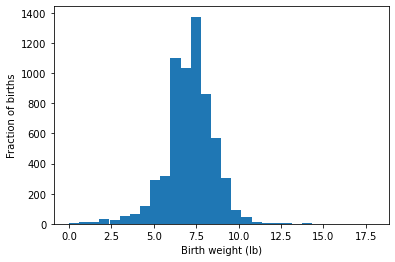

In [19]:
plt.hist(birth_weight.dropna(), bins=30)

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

Here's what the results look like. 

The x-axis is birth weight in pounds, divided into 30 bins. 

The y-axis is the number of births in each bin. 

The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies. That makes sense because the distribution includes some babies that were born preterm. The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

### Boolean Series
To see which babies are preterm, we can use the prglngth column, which records pregnancy length in weeks. 

In [20]:
preterm = nsfg['prglngth'] < 37

When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False. In this case, it's True for each preterm baby and False otherwise. 

We can use `head()` to see the first 5 elements.

In [21]:
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

If you compute the sum of a Boolean Series, it treats True as `1` and False as `0`, so the sum is the number of Trues, which is the number of preterm babies, about 3700. 

In [22]:
preterm.sum()

3742

If you compute the mean, you get the fraction of Trues; in this case, it's close to 0.4; that is, about 40% of the births in this dataset are preterm.

In [23]:
preterm.mean()

0.39987176747168196

### Filtering
We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criteria. 

For example, we can use preterm and the bracket operator to select values from `birth_weight`, so `preterm_weight` contains birth weights for preterm babies. 

In [24]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

To select full-term babies, we can use the tilde operator, which is "logical NOT" or inverse; it makes the Trues false and the Falses true. 

In [25]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

Not surprisingly, full term babies are heavier, on average, than preterm babies.

If you have two Boolean Series, you can use logical operators to combine them; `&` is the logical AND operator, and `|` or pipe is logical OR.

### Resampling
There's one more thing we have to do before we can answer our question: resampling.

The **NSFG is not exactly representative** of the U.S. population; by design, **some groups are** more likely to appear in the sample than others; they are **"oversampled"**. 

Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. 

However, we can correct for oversampling by resampling using `resample_rows_weighted()`.

## Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable `'agecon'` that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the `bins` parameter, and also a new parameter - `histtype` - which you can read more about [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) in the `matplotlib` documentation.

- Plot a histogram of `ageco` with `20` bins.

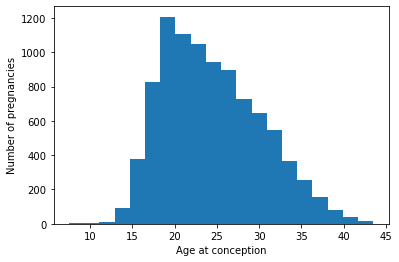

In [26]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

- Adapt your code to make an unfilled histogram by setting the parameter `histtype` to be `'step'`.

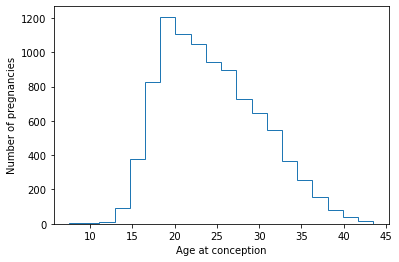

In [27]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Compute birth weight
Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, `resample_rows_weighted`, that takes the NSFG data and resamples it using the sampling weights in `wgt2013_2015`. The result is a sample that is representative of the U.S. population.

Then I extract `birthwgt_lb1` and `birthwgt_oz1`, replace special codes with NaN, and compute total birth weight in pounds, `birth_weight`.

```python
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16
```

- Make a Boolean Series called `full_term` that is true for babies with `'prglngth'` greater than or equal to 37 weeks.
- Use `full_term` and `birth_weight` to select birth weight in pounds for full-term babies. Store the result in `full_term_weight`.
- Compute the mean weight of full-term babies.

In [28]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


## Filter
In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

- Use the variable `'nbrnaliv'` to make a Boolean Series that is `True` for single births (where `'nbrnaliv'` equals `1`) and `False` otherwise.
- Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
- For comparison, select multiple, full-term babies and compute their mean birth weight.

In [29]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


*Now that we have clean data, we're ready to explore.*